# Residual Attention Network

In [ ]:
cd '/content/gdrive/MyDrive/COSI/Video processing and Advanced project/Residual-Attention-Network-master.zip (Unzipped Files)/Residual-Attention-Network-master/Notebooks'

In [2]:
import sys
sys.path.append("..")

from Code.ResidualAttentionNetwork import ResidualAttentionNetwork

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

import h5py

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

# Network Metadata 

In [4]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

batch_size=64

epochs = 60

# Image Generators

For data, download from Kaggle: https://www.kaggle.com/c/dogs-vs-cats

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    validation_split=.20
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    directory="C:/Users/colorlab/Downloads/Emotion_Classes-20211030T160812Z-001/Residual-Attention-Neww/train", 
    shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size
)



validation_generator = test_datagen.flow_from_directory(
    directory="C:/Users/colorlab/Downloads/Emotion_Classes-20211030T160812Z-001/Residual-Attention-Neww/test", 
    shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=batch_size)

Found 10600 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [8]:
import tensorflow as tf
model = ResidualAttentionNetwork((IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), 10, activation='softmax').build_model()

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN, verbose=1,
                    validation_data=validation_generator, validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)

C:\Users\colorlab\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-8-bc465fb16dfc>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/60
165/165 [==============================] - 55s 317ms/step - loss: 2.5660 - accuracy: 0.2275 - val_loss: 3.9658 - val_accuracy: 0.1182
Epoch 2/60
165/165 [==============================] - 50s 302ms/step - loss: 1.8152 - accuracy: 0.3611 - val_loss: 2.4232 - val_accuracy: 0.1755
Epoch 3/60
165/165 [==============================] - 51s 306ms/step - loss: 1.5983 - accuracy: 0.4416 - val_loss: 1.5785 - val_accuracy: 0.4383
Epoch 4/60
165/165 [==============================] - 50s 306ms/step - loss: 1.4457 - accuracy: 0.4923 - val_loss: 1.3903 - val_accuracy: 0.5345
Epoch 5/60
165/165 [==============================] - 51s 308ms/step - loss: 1.3308 - accuracy: 0.5410 - val_loss: 1.2825 - val_accuracy: 0.5469
Epoch 6/60
165/165 [==============================] - 51s 306ms/step - loss: 1.2487 - accuracy: 0.5645 - val_loss: 1.1492 - val_accuracy: 0.6190
Epoch 7/60
165/165 [==============================] - 50s 305ms/step - loss: 1.1894 - accuracy: 0.5891 - val_loss: 1.1697 - val_ac

# Visualize Data 

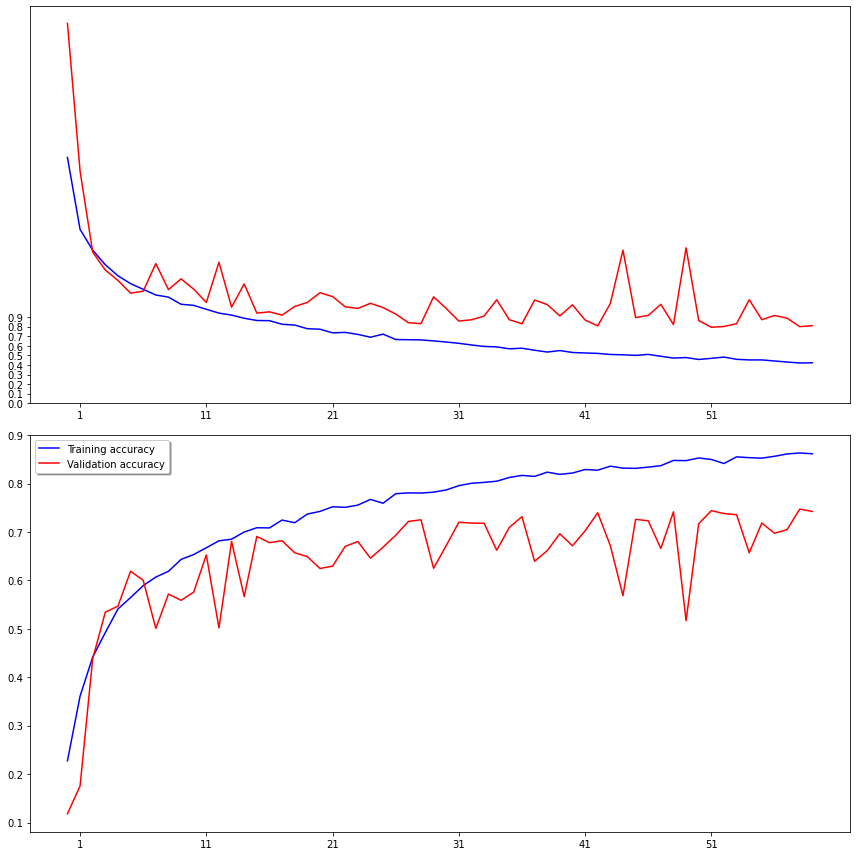

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 10))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 10))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

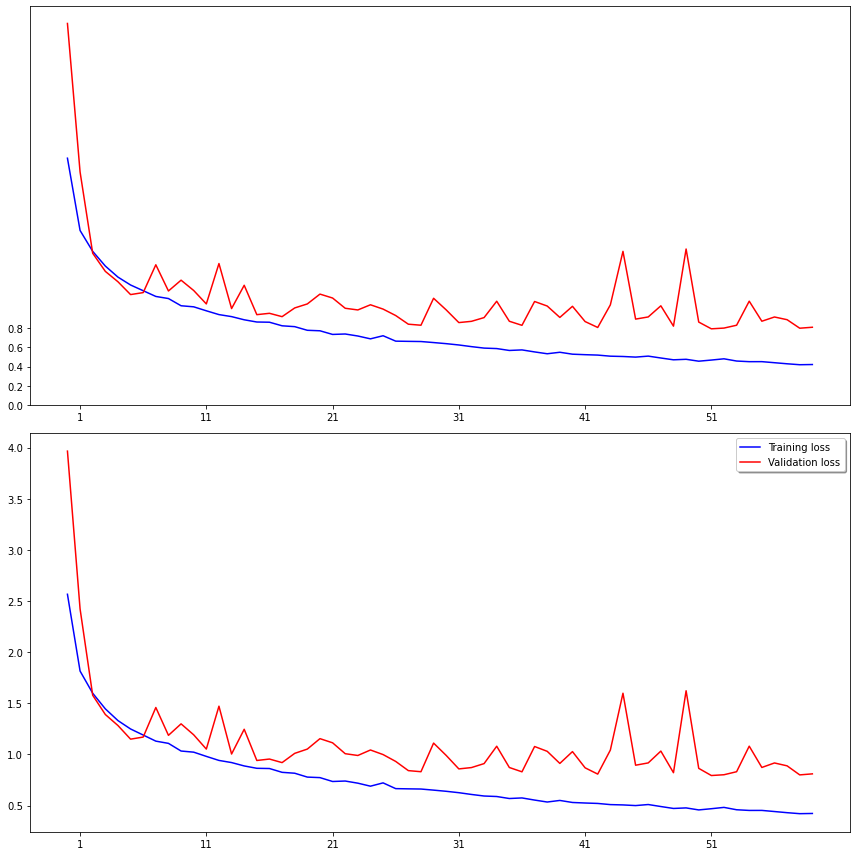

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 10))
ax1.set_yticks(np.arange(0, 1, 0.2))

ax2.plot(history.history['loss'], color='b', label="Training loss")
ax2.plot(history.history['val_loss'], color='r',label="Validation loss")
ax2.set_xticks(np.arange(1, epochs, 10))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Evaluate Model on Validation Data

In [10]:
loss, accuracy = model. evaluate_generator(validation_generator, STEP_SIZE_VALID, verbose=1)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

<ipython-input-10-ef8d8ba44365>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model. evaluate_generator(validation_generator, STEP_SIZE_VALID, verbose=1)


39/39 [==============================] - 3s 79ms/step - loss: 0.8079 - accuracy: 0.7432
Test: accuracy = 0.743189  ;  loss = 0.807892 
